In [2]:
#Step 1: Load the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('salary_data.csv')
print(df.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


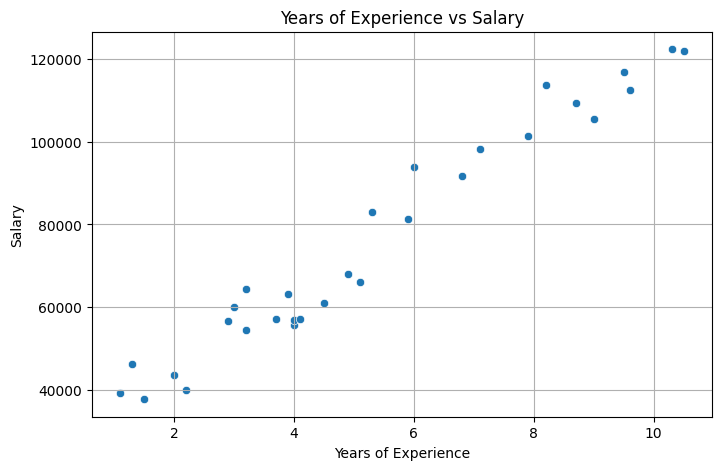

In [3]:
#Step 2: Visualize the Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


In [4]:
#Step 3: Split the Dataset
from sklearn.model_selection import train_test_split

X = df[['YearsExperience']]  # Independent variable
y = df['Salary']             # Dependent variable

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#Step 4: Train the Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: 25321.583011776813
Coefficient: 9423.815323030976


In [6]:
#Step 5: Make Predictions and Evaluate
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 49830096.85590839
R² Score: 0.9024461774180497


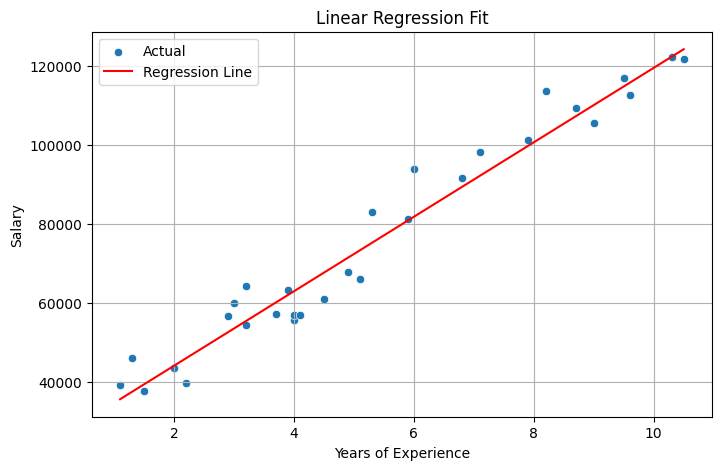

In [7]:
#Step 6: Plot the Regression Line
# Plotting regression line over scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Actual')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


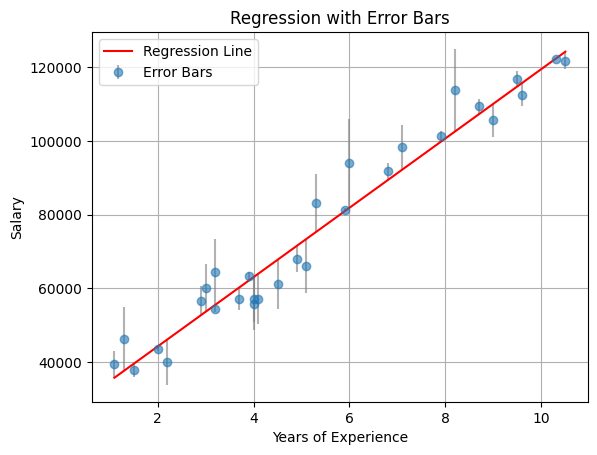

In [8]:
#Bonus 1: Add Error Bars
import numpy as np

errors = np.abs(y - model.predict(X))
plt.errorbar(X['YearsExperience'], y, yerr=errors, fmt='o', ecolor='gray', alpha=0.6, label='Error Bars')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Regression with Error Bars")
plt.grid(True)
plt.show()


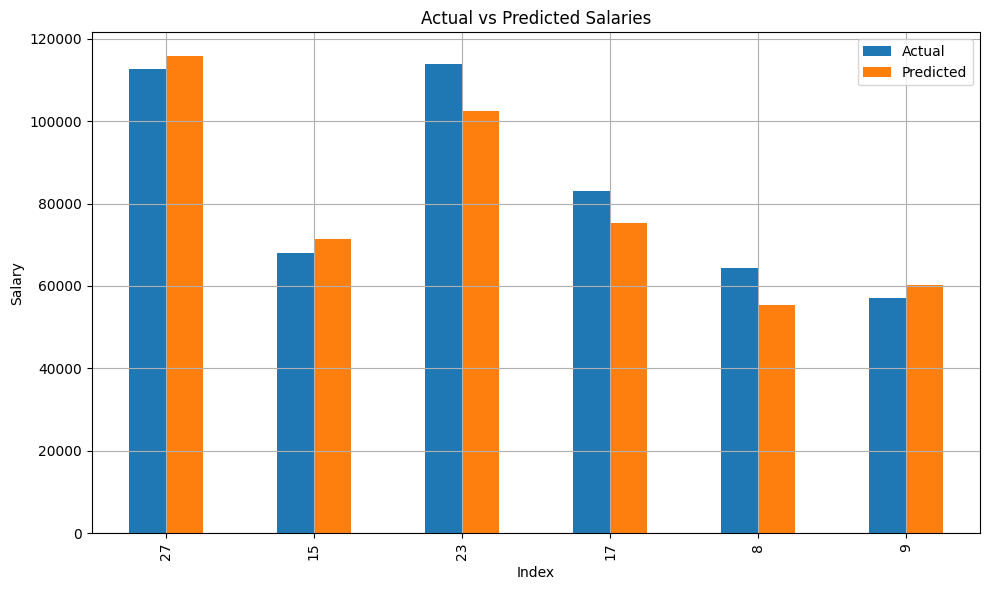

In [9]:
#Bonus 2: Compare Actual vs Predicted Salaries
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
 #Bonus 3: User Input for Prediction
 def predict_salary():
    exp = float(input("Enter years of experience: "))
    salary = model.predict([[exp]])
    print(f"Predicted Salary for {exp} years: ₹{salary[0]:.2f}")

predict_salary()


Enter years of experience: 5
Predicted Salary for 5.0 years: ₹72440.66


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
